In [ ]:
import pandas as pd
import numpy as np

#Data Extraction

In [ ]:
data = pd.read_csv("vdoLinks.csv") #reading the csv file 
data.head()

,youtubeId,movieId,title
0,K26_sDKnvMU,1,Toy Story (1995)
1,3LPANjHlPxo,2,Jumanji (1995)
2,rEnOoWs3FuA,3,Grumpier Old Men (1995)
3,j9xml1CxgXI,4,Waiting to Exhale (1995)
4,ltwvKLnj1B4,5,Father of the Bride Part II (1995)


In [ ]:
data.shape #analyse the shape

(25623, 3)

###Import Youtube API for collecting data

In [ ]:
from googleapiclient.discovery import build
#API_Key = 'AIzaSyD8fGUnP5Ua2_GM9BUTVRb3zpgE5FxYFHs3fhgh'
#API_Key =  'AIzaSyAda2ddwGOtYA63nsjvf53utdj7ioeMl0s3fjjk'
#API_Key =  'AIzaSyDB_6PTzu_hYTe1DbIdiyOb85cPCuy2eAQ45kls'
#API_Key = 'AIzaSyAkEfh-Px3e3N57T2rHGfzi9craYiF5w2k89dfhj'

In [ ]:
 #youtube = build('youtube','v3',developerKey=API_Key)

##Get Video Comments

In [ ]:
# def get_video_comments(v_id,API_KEY):
#   count = 0
#   youtube = build('youtube','v3',developerKey=API_Key)
#   response = youtube.commentThreads().list(
#     part = 'snippet,replies',
#     maxResults = 100,
#     videoId = v_id
#       ).execute()
    
#   for item in response['items']:
#     count +=1
#     print("comment-",count,":")
#     Name = item['snippet']['topLevelComment']['snippet']['authorDisplayName']
#     comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
#     image = item['snippet']['topLevelComment']['snippet']['authorProfileImageUrl']
#     print(f"Comment of user is :{comment}")



Get Video Description file

In [ ]:
# import csv

# viewCount = ""
# likeCount =""
# commentCount =""
# favoriteCount =""
# duration =""
# description =""
# dislikeCount=""

# count =0

In [ ]:
# video_response = youtube.videos().list(
#     part = 'contentDetails,statistics,snippet',
#       id = 'K26_sDKnvMU'
#       ).execute()

In [ ]:
list1 = []
list1.append([video_response,1])

In [ ]:
import json

In [ ]:
list1

In [ ]:
# with open("file.json", 'w') as f:
#     # indent=2 is not needed but makes the file human-readable 
#     # if the data is nested
#     json.dump(list1, f, indent=2) 

# with open("file.json", 'r') as f:
#     score = json.load(f)

# print(score)

[[{'kind': 'youtube#videoListResponse', 'etag': 'Zh9JWqpdbXxt17kSpYLcWf41aTY', 'items': [{'kind': 'youtube#video', 'etag': '4NeA_v8iJe_EgmISbkWL01TNwJ4', 'id': 'K26_sDKnvMU', 'snippet': {'publishedAt': '2015-05-26T17:11:42Z', 'channelId': 'UC1o_r-f-ZG-x6U9c6MfUfHQ', 'title': 'Toy Story (1995) Trailer 2 (VHS Capture)', 'description': 'Trailer for Toy Story (1995) captured from the The Santa Clause (1994) VHS tape. This tape is labeled 3633 and released in (1994).', 'thumbnails': {'default': {'url': 'https://i.ytimg.com/vi/K26_sDKnvMU/default.jpg', 'width': 120, 'height': 90}, 'medium': {'url': 'https://i.ytimg.com/vi/K26_sDKnvMU/mqdefault.jpg', 'width': 320, 'height': 180}, 'high': {'url': 'https://i.ytimg.com/vi/K26_sDKnvMU/hqdefault.jpg', 'width': 480, 'height': 360}, 'standard': {'url': 'https://i.ytimg.com/vi/K26_sDKnvMU/sddefault.jpg', 'width': 640, 'height': 480}}, 'channelTitle': 'retro VHS trailers', 'tags': ['1995', 'Capture', 'promo', 'preview', 'teaser', 'trailer', 'vhs', 'vc

In [ ]:
Video_list = []

In [ ]:
Comment_list = []

In [ ]:
def video_search_id(videoID):
  
  try:
    video_response = youtube.videos().list(
            part = 'contentDetails,statistics,snippet',
            id = videoID
        ).execute()

  except:
    video_response = {}
    print("failed video")

  Video_list.append([video_response,videoID])

  try:
    response = youtube.commentThreads().list(part = 'snippet,replies',maxResults = 100,videoId = videoID).execute()
  except:

    response = {}
    print("failed response")
  
  Comment_list.append([response,videoID])




In [ ]:
data_4t8 = data.iloc[19502:24404,:]

In [ ]:
data_4t8

,youtubeId,movieId,title
19502,i6upoz9I7eg,101186,Populaire (2012)
19503,obNpTfAga6M,101188,Central Park (1991)
19504,_SUjoQ7QyeM,101200,"Hello, Friend (2003)"
19505,xHCJ5KZ4tdA,101204,"Hucksters, The (1947)"
19506,fUTQrOGYhGI,101207,Emperor (2012)
...,...,...,...
24399,v0I-XNUyOWI,123669,"See Here, Private Hargrove (1944)"
24400,zxjMj0byLXo,123735,Vito (2011)
24401,EdBXqVTF9LE,123761,The Golden Eye (1948)
24402,fIwF60gHa_4,123773,Sh! The Octopus (1937)


In [ ]:
counter = 0
for index, row in data_4t8.iterrows():#prev data 0-4900
  if counter > 4900:
    break
  video_search_id(row['youtubeId'])
  counter +=1
  print(counter)


In [ ]:
#Video_list[4848]

In [ ]:
with open("VideoResponse19502_24350.json", 'w') as f:
    # indent=2 is not needed but makes the file human-readable 
    # if the data is nested
    json.dump(Video_list, f, indent=2) 

In [ ]:
with open("CommentResponse19502_24350.json", 'w') as f:
    # indent=2 is not needed but makes the file human-readable 
    # if the data is nested
    json.dump(Comment_list, f, indent=2) 

In [ ]:
def video_Search_csv(list_Data,videoID):

  # global viewCount
  # global likeCount
  # global commentCount
  # global favoriteCount
  # global duration 
  # global description
  # global count
  # global dislikeCount

  Title = ""
  viewCount =""
  likeCount =""
  commentCount =""
  favoriteCount =""
  duration = ""
  description =""
  dislikeCount = ""
  try:

    #csvFile = open('video_result.csv','w')
    # video_response = youtube.videos().list(
    #       part = 'contentDetails,statistics,snippet',
    #       id = videoID
    #   ).execute()

    for video_result in list_Data.get("items",[]):

      Title = video_result["snippet"]["title"]
      description = video_result["snippet"]["description"]
      if 'viewCount' not in video_result["statistics"]:
        viewCount = 0
      else:
        viewCount = video_result["statistics"]["viewCount"]
      if 'likeCount' not in video_result["statistics"]:
        likeCount = 0
      else:
        likeCount = video_result["statistics"]["likeCount"]
      if 'dislikeCount' not in video_result["statistics"]:
          dislikeCount = 0
      else:
          dislikeCount = video_result["statistics"]["dislikeCount"]
      if 'commentCount' not in video_result["statistics"]:
          commentCount = 0
      else:
          commentCount = video_result["statistics"]["commentCount"]

      if 'favoriteCount' not in video_result["statistics"]:
          favoriteCount = 0
      else:
          favoriteCount = video_result["statistics"]["favoriteCount"]

      if 'duration' not in video_result["contentDetails"]:
          duration = 0
      else:
          duration  = video_result["contentDetails"]["duration"]
  except:
    print("api error")

  csvWriter.writerow([Title,description,videoID,viewCount,likeCount,dislikeCount,commentCount,duration,favoriteCount])
       
  




In [ ]:
import csv


Video File analysis

In [ ]:
with open("VideoResponse4900.json", 'r') as f:
    video_Data_1 = json.load(f)

with open("VideoResponse4900_9796.json", 'r') as f:
    video_Data_2 = json.load(f)

with open("VideoResponse9797_14700.json", 'r') as f:
    video_Data_3 = json.load(f)

with open("VideoResponse14610_19502.json", 'r') as f:
    video_Data_4 = json.load(f)

with open("VideoResponse19502_24350.json", 'r') as f:
    video_Data_5 = json.load(f)
    
with open("VideoResponse24350_25623.json", 'r') as f:
    video_Data_6 = json.load(f)

In [ ]:
# for video_result in video_Data[0][0].get("items",[]):
#   Title = video_result["snippet"]["title"]
#   description = video_result["snippet"]["description"]
#   viewCount = video_result["statistics"]["viewCount"]
#   if 'likeCount' not in video_result["statistics"]:
#     likeCount = 0
#   else:
#     likeCount = video_result["statistics"]["likeCount"]
#   if 'dislikeCount' not in video_result["statistics"]:
#     dislikeCount = 0
#   else:
#     dislikeCount = video_result["statistics"]["dislikeCount"]

In [ ]:
#create csv output for video files

#video file 1
csvFile = open('video_data_1.csv','w')
csvWriter = csv.writer(csvFile)
csvWriter.writerow(["title","description","videoId","viewCount","likeCount","dislikeCount","commentCount","Duration","FavouriteCount"])
for response,id in video_Data_1:
  video_Search_csv(response,id)


csvFile.close()


#video file 2 

csvFile = open('video_data_2.csv','w')
csvWriter = csv.writer(csvFile)
csvWriter.writerow(["title","description","videoId","viewCount","likeCount","dislikeCount","commentCount","Duration","FavouriteCount"])
for response,id in video_Data_2:
  video_Search_csv(response,id)


csvFile.close()

#video file 3
csvFile = open('video_data_3.csv','w')
csvWriter = csv.writer(csvFile)
csvWriter.writerow(["title","description","videoId","viewCount","likeCount","dislikeCount","commentCount","Duration","FavouriteCount"])
for response,id in video_Data_3:
  video_Search_csv(response,id)


csvFile.close()

#video file 4
csvFile = open('video_data_4.csv','w')
csvWriter = csv.writer(csvFile)
csvWriter.writerow(["title","description","videoId","viewCount","likeCount","dislikeCount","commentCount","Duration","FavouriteCount"])
for response,id in video_Data_4:
  video_Search_csv(response,id)


csvFile.close()

#video file 5
csvFile = open('video_data_5.csv','w')
csvWriter = csv.writer(csvFile)
csvWriter.writerow(["title","description","videoId","viewCount","likeCount","dislikeCount","commentCount","Duration","FavouriteCount"])
for response,id in video_Data_5:
  video_Search_csv(response,id)


csvFile.close()

#video file 6
csvFile = open('video_data_6.csv','w')
csvWriter = csv.writer(csvFile)
csvWriter.writerow(["title","description","videoId","viewCount","likeCount","dislikeCount","commentCount","Duration","FavouriteCount"])
for response,id in video_Data_6:
  video_Search_csv(response,id)


csvFile.close()

In [ ]:
# for response,id in video_Data:
  
#   for video_result in response.get("items",[]):
#     Title = video_result["snippet"]["title"]
#     print(Title)
#     description = video_result["snippet"]["description"]
#     if 'viewCount' not in video_result["statistics"]:
#       viewCount = 0
#     else:
#       viewCount = video_result["statistics"]["viewCount"]
#     if 'likeCount' not in video_result["statistics"]:
#       likeCount = 0
#     else:
#       likeCount = video_result["statistics"]["likeCount"]
#     if 'dislikeCount' not in video_result["statistics"]:
#       dislikeCount = 0
#     else:
#       dislikeCount = video_result["statistics"]["dislikeCount"]

In [ ]:
    # Comments = []
    # comments_string = ""
    # try:
    #   # response = youtube.commentThreads().list(part = 'snippet,replies',
    #   #         maxResults = 100,
    #   #         videoId = videoID).execute()
    #   for item in response['items']:
    #     comment_item = item['snippet']['topLevelComment']['snippet']['textDisplay']
    #     Comments.append(comment_item)
    # except:
    #   print("comment error")
 
    # comments_string = str(Comments)

In [ ]:
#comment file
def commentsearch_csv(response,id):
  Comments = []
  comments_string = ""
  try:
      # response = youtube.commentThreads().list(part = 'snippet,replies',
      #         maxResults = 100,
      #         videoId = videoID).execute()
      for item in response['items']:
        comment_item = item['snippet']['topLevelComment']['snippet']['textDisplay']
        Comments.append(comment_item)
  except:
    print("comment error")
 
  comments_string = str(Comments)

  csvWriter.writerow([id,comments_string])

In [ ]:
# with open("CommentResponse4900.json", 'r') as f:
#     Comment_Data_1 = json.load(f)

# with open("CommentResponse4900_9796.json", 'r') as f:
#     Comment_Data_2 = json.load(f)

# with open("CommentResponse9797_14700.json", 'r') as f:
#     Comment_Data_3 = json.load(f)


# with open("CommentResponse14610_19502.json", 'r') as f:
#     Comment_Data_4 = json.load(f)

# with open("CommentResponse19502_24350.json", 'r') as f:
#     Comment_Data_5 = json.load(f)

# with open("CommentResponse24350_25623.json", 'r') as f:
#     Comment_Data_6 = json.load(f)

In [ ]:
#extracting comments 
#comment 1
# counter =0
# csvFile = open('comments_search_1.csv','w')
# csvWriter = csv.writer(csvFile)
# csvWriter.writerow(["videoId","Comments"])
# for response,id in Comment_Data_1:
#   if counter >4900:
#     break
#   commentsearch_csv(response,id)

#   counter +=1


# csvFile.close()


# #comment 2
# counter =0
# csvFile = open('comments_search_2.csv','w')
# csvWriter = csv.writer(csvFile)
# csvWriter.writerow(["videoId","Comments"])
# for response,id in Comment_Data_2:
#   if counter >4900:
#     break
#   commentsearch_csv(response,id)

#   counter +=1


# csvFile.close()


# #comment 3

# counter =0
# csvFile = open('comments_search_3.csv','w')
# csvWriter = csv.writer(csvFile)
# csvWriter.writerow(["videoId","Comments"])
# for response,id in Comment_Data_3:
#   if counter >4900:
#     break
#   commentsearch_csv(response,id)

#   counter +=1


# csvFile.close()


# #comment 4

# counter =0
# csvFile = open('comments_search_4.csv','w')
# csvWriter = csv.writer(csvFile)
# csvWriter.writerow(["videoId","Comments"])
# for response,id in Comment_Data_4:
#   if counter >4900:
#     break
#   commentsearch_csv(response,id)

#   counter +=1


# csvFile.close()


#comment 5

# counter =0
# csvFile = open('comments_search_5.csv','w')
# csvWriter = csv.writer(csvFile)
# csvWriter.writerow(["videoId","Comments"])
# for response,id in Comment_Data_5:
#   if counter >4900:
#     break
#   commentsearch_csv(response,id)

#   counter +=1


# csvFile.close()

# counter =0
# csvFile = open('comments_search_6.csv','w')
# csvWriter = csv.writer(csvFile)
# csvWriter.writerow(["videoId","Comments"])
# for response,id in Comment_Data_6:
#   if counter >4900:
#     break
#   commentsearch_csv(response,id)

#   counter +=1


# csvFile.close()

In [ ]:
data_4900 = pd.read_csv("video_data_1.csv") #reading the csv file 
data_4900.head(5)

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,K26_sDKnvMU,106739.0,113.0,0.0,0.0,PT1M31S,0.0
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,3LPANjHlPxo,182343.0,267.0,0.0,0.0,PT2M48S,0.0
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",rEnOoWs3FuA,186157.0,219.0,0.0,13.0,PT1M52S,0.0
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,j9xml1CxgXI,379175.0,0.0,0.0,0.0,PT2M40S,0.0
4,NaN,NaN,ltwvKLnj1B4,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_4900 = data_4900.iloc[:4900,:]
data_4900.shape

(4900, 9)

In [ ]:
data_4900.to_csv("video_data_1.csv",index=None)

In [ ]:
df_vdata_1 = pd.read_csv("video_data_1.csv")
df_vdata_1

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,K26_sDKnvMU,106739.0,113.0,0.0,0.0,PT1M31S,0.0
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,3LPANjHlPxo,182343.0,267.0,0.0,0.0,PT2M48S,0.0
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",rEnOoWs3FuA,186157.0,219.0,0.0,13.0,PT1M52S,0.0
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,j9xml1CxgXI,379175.0,0.0,0.0,0.0,PT2M40S,0.0
4,NaN,NaN,ltwvKLnj1B4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
4895,NaN,NaN,7ULnA9rlTtc,NaN,NaN,NaN,NaN,NaN,NaN
4896,Vacas (1992),Vacas (1992)\r\nDirected by Julio Medem,wRFgORD3dkA,41355.0,48.0,0.0,5.0,PT4M48S,0.0
4897,Three Reasons: Don’t Look Now,Those are our three reasons. What are yours?,Qp7IYZzPSko,35962.0,275.0,0.0,26.0,PT1M20S,0.0
4898,Crossroads - Trailer,"Britney lights up the screen."" - Sandie Newton...",vb398BOlv0Q,1264359.0,0.0,0.0,0.0,PT2M26S,0.0


In [ ]:
df_vdata_2 = pd.read_csv("video_data_2.csv") #reading the csv file 

In [ ]:
df_vdata_2.shape

(4896, 9)

In [ ]:
df_vdata_3 = pd.read_csv("video_data_3.csv")
df_vdata_3

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount
0,December 7th (1943),Department of War\r\nDepartment of the Navy\r\...,IDNFZSFZ__E,44570.0,190.0,0.0,20.0,PT1H21M33S,0.0
1,Bataan - Trailer,"During World War II, a small platoon of U.S. s...",I1r_Q2HAstA,75295.0,0.0,0.0,8.0,PT2M9S,0.0
2,Madagascar Trailer (2005) (HD 1080p),Madagascar Trailer HD.,adPvbscBK_8,310781.0,243.0,0.0,0.0,PT1M55S,0.0
3,NaN,NaN,fU0zHux5kHc,NaN,NaN,NaN,NaN,NaN,NaN
4,11 HARROWHOUSE (1974) ORIGINAL THEATRICAL TRAILER,THIS IS THE ORIGINAL TRAILER FOR THE 1974 CAPE...,1wTxk6KLrDs,12213.0,52.0,0.0,9.0,PT2M33S,0.0
...,...,...,...,...,...,...,...,...,...
4896,NaN,NaN,BMoKwGQtiWs,NaN,NaN,NaN,NaN,NaN,NaN
4897,NaN,NaN,b-YSca6Ci-I,NaN,NaN,NaN,NaN,NaN,NaN
4898,Panama Hattie - Trailer,"Hattie Maloney (Ann Sothern) is a gaudy, good-...",nDrZ8O4nRkQ,5341.0,0.0,0.0,1.0,PT1M37S,0.0
4899,NaN,NaN,K_X9Gv1aMeQ,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_vdata_4 = pd.read_csv("video_data_4.csv")
df_vdata_4

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount
0,Les Dalton Trailer (2004),NaN,cBxv6v7KGIQ,104472.0,95.0,0.0,7.0,PT1M48S,0.0
1,"Three... Extremes II - ""Memories"" Bloody Finge...",Probably the only freaky scene in Memories. Re...,u5RhVpd0unU,101930.0,79.0,0.0,23.0,PT1M23S,0.0
2,Three Men And a Cradle / 3 hommes et un couffi...,Directed by : Coline Serreau \nProduced by : F...,H9AAokxja0w,24230.0,61.0,0.0,19.0,PT2M2S,0.0
3,Trailer: THE SKY CRAWLERS,"Trailer for the fantastic Mamoru Oshii film, T...",oddimR3JNcg,58063.0,120.0,0.0,35.0,PT1M7S,0.0
4,THE BRIDESMAID - Official Trailer,http://firstrunfeatures.com/bridesmai... It's ...,H5mr1WBx9eg,41233.0,74.0,0.0,6.0,PT1M46S,0.0
...,...,...,...,...,...,...,...,...,...
4896,NaN,NaN,fUTQrOGYhGI,NaN,NaN,NaN,NaN,NaN,NaN
4897,NaN,NaN,sbHc0mgR6mE,NaN,NaN,NaN,NaN,NaN,NaN
4898,The Girl Official TRAILER #1 (2012) - Abbie Co...,Subscribe to TRAILERS: http://bit.ly/sxaw6h\nS...,Tf0mgVMQT8Y,320164.0,679.0,0.0,99.0,PT3M,0.0
4899,NaN,NaN,F0L-e_u52TU,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_vdata_5 = pd.read_csv("video_data_5.csv")
df_vdata_5

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount
0,Populaire Official US Release Trailer #1 (2013...,Subscribe to TRAILERS: http://bit.ly/sxaw6h\nS...,i6upoz9I7eg,377937.0,2081.0,0.0,147.0,PT1M47S,0.0
1,Paul Simon - 01 - Obvious Child,From Paul Simon's concert in the park in new y...,obNpTfAga6M,245094.0,652.0,0.0,76.0,PT4M28S,0.0
2,"Hello, Friend ! (Full length, 2003)",When a man receives an email advertising a new...,_SUjoQ7QyeM,10646.0,144.0,0.0,0.0,PT13M48S,0.0
3,THE HUCKSTERS Clark Gable meets Sydney Greens...,Clark Gable meets Sydney Greenstreet.. 1947\r\...,xHCJ5KZ4tdA,23370.0,89.0,0.0,16.0,PT2M36S,0.0
4,"EMPEROR, Theatrical Trailer",IN THEATERS MARCH 8th! A gripping tale of love...,fUTQrOGYhGI,86605.0,136.0,0.0,24.0,PT2M25S,0.0
...,...,...,...,...,...,...,...,...,...
4896,Sybil ~ The true & extraordinary story of a yo...,Sybil \nThe true & extraordinary story of a yo...,m1_Z6-v4uT0,641655.0,908.0,0.0,462.0,PT7M3S,0.0
4897,NaN,NaN,v0I-XNUyOWI,NaN,NaN,NaN,NaN,NaN,NaN
4898,HBO Documentary Films: Vito Trailer,Tune in to the new HBO Documentary Film on Mon...,zxjMj0byLXo,15259.0,41.0,0.0,2.0,PT47S,0.0
4899,NaN,NaN,EdBXqVTF9LE,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_vdata_6 = pd.read_csv("video_data_6.csv")
df_vdata_6

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount
0,Head Office,"This is the funniest most ""accurate"" movie mad...",bAVXp1oGjHA,81659.0,571.0,0.0,156.0,PT1H30M53S,0.0
1,NaN,NaN,6Pvt-WvlJ-A,NaN,NaN,NaN,NaN,NaN,NaN
2,The Magic Box (1951) - You must be a very happ...,"The story of William Friese-Greene, a British ...",UxHA9U8IHfM,26135.0,198.0,0.0,42.0,PT4M39S,0.0
3,NaN,NaN,YhqNJCCTITs,NaN,NaN,NaN,NaN,NaN,NaN
4,KNIGHT WITHOUT ARMOR,"1937 historical drama, starring Robert Donat &...",1N7zj2bZlAI,240861.0,1169.0,0.0,221.0,PT1H42M33S,0.0
...,...,...,...,...,...,...,...,...,...
1268,Forklift Driver Klaus English Subtitles,Crazy German video about forklift driver safety,-oB6DN5dYWo,2578896.0,32323.0,0.0,1676.0,PT9M20S,0.0
1269,NaN,NaN,DK7KQ-gEdl4,NaN,NaN,NaN,NaN,NaN,NaN
1270,NaN,NaN,v29P-wchMZQ,NaN,NaN,NaN,NaN,NaN,NaN
1271,NaN,NaN,dAz-nZ65jYU,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Merge Video Data

merged_video_data = pd.concat([df_vdata_1,df_vdata_2,df_vdata_3,df_vdata_4,df_vdata_5,df_vdata_6], axis=0)
merged_video_data

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,K26_sDKnvMU,106739.0,113.0,0.0,0.0,PT1M31S,0.0
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,3LPANjHlPxo,182343.0,267.0,0.0,0.0,PT2M48S,0.0
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",rEnOoWs3FuA,186157.0,219.0,0.0,13.0,PT1M52S,0.0
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,j9xml1CxgXI,379175.0,0.0,0.0,0.0,PT2M40S,0.0
4,NaN,NaN,ltwvKLnj1B4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1268,Forklift Driver Klaus English Subtitles,Crazy German video about forklift driver safety,-oB6DN5dYWo,2578896.0,32323.0,0.0,1676.0,PT9M20S,0.0
1269,NaN,NaN,DK7KQ-gEdl4,NaN,NaN,NaN,NaN,NaN,NaN
1270,NaN,NaN,v29P-wchMZQ,NaN,NaN,NaN,NaN,NaN,NaN
1271,NaN,NaN,dAz-nZ65jYU,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_video_data.shape

(25772, 9)

In [ ]:
data_comments_1 = pd.read_csv("comments_search_.csv")
data_comments_1

,videoId,Comments
0,K26_sDKnvMU,[]
1,3LPANjHlPxo,[]
2,rEnOoWs3FuA,"['Buena película de comedia romántica', '<a hr..."
3,j9xml1CxgXI,[]
4,ltwvKLnj1B4,[]
...,...,...
4896,wRFgORD3dkA,['La peli se mira genial pero no la encuentro ...
4897,Qp7IYZzPSko,['criterion are just the freaking best in qual...
4898,vb398BOlv0Q,[]
4899,yOBPV_r4_hs,['Marcel Iures is the best thing this movie ha...


In [ ]:
data_comments_2 = pd.read_csv("comments_search_2.csv")
data_comments_2

,videoId,Comments
0,w-0_tN6O-5k,"['EXCELLENT Movie... Amazing actor.', 'Reality..."
1,6z8XLYbzOkY,[]
2,v4AE-ZoZarc,['Super Troopers (2001)\r<br>-----------------...
3,pP4P-VgcM4s,"['2022 &lt;3', 'HAHA WHT A SICK HORSESHIT , TH..."
4,M0zTunFLdwY,[]
...,...,...
4896,gNnEWwXGE_s,['prachtige film xD']
4897,IDNFZSFZ__E,"['Here because of Nick, thanks Nick.', 'Roosev..."
4898,I1r_Q2HAstA,[]
4899,adPvbscBK_8,[]


In [ ]:
data_comments_3 = pd.read_csv("comments_search_3.csv")
data_comments_3

,videoId,Comments
0,IDNFZSFZ__E,"['Here because of Nick, thanks Nick.', 'Roosev..."
1,I1r_Q2HAstA,['Ojalá coloquen esa joya del cine clásico en ...
2,adPvbscBK_8,[]
3,fU0zHux5kHc,[]
4,1wTxk6KLrDs,['Saw this in first run. I was young but I rem...
...,...,...
4896,BMoKwGQtiWs,"['吉蔵の妻と定が取っ組み合いの喧嘩をするシーンが死ぬほど笑いましたwww', 'This ..."
4897,b-YSca6Ci-I,[]
4898,nDrZ8O4nRkQ,[]
4899,K_X9Gv1aMeQ,[]


In [ ]:
data_comments_4 = pd.read_csv("comments_search_4.csv")
data_comments_4

,videoId,Comments
0,cBxv6v7KGIQ,"['Depuis quand Lucky Luke a deux pistolet?', '..."
1,u5RhVpd0unU,['Halfway between Takashi Miike and Hideo Naka...
2,H9AAokxja0w,"['Is there a ghost in this version?', 'Un mess..."
3,oddimR3JNcg,['Nice tagline...&quot;when everyday could be ...
4,H5mr1WBx9eg,['I am disappointed that Sentra does not look ...
...,...,...
4896,fUTQrOGYhGI,[]
4897,sbHc0mgR6mE,"['Where can I see the entire film please', '&q..."
4898,Tf0mgVMQT8Y,[]
4899,F0L-e_u52TU,[]


In [ ]:
data_comments_5 = pd.read_csv("comments_search_5.csv")
data_comments_5

,videoId,Comments
0,i6upoz9I7eg,['この映画を最初にみたときは気付かなかったけど、Wikipediaさんみたら、早打ちの練習...
1,obNpTfAga6M,['I am more than a little sad to see the state...
2,_SUjoQ7QyeM,[]
3,xHCJ5KZ4tdA,"['Clark needS some FAST, FAST, FASRT RELIEF!',..."
4,fUTQrOGYhGI,['Emperor (2020) f&#39;u&quot;l&#39;l M&#39;o&...
...,...,...
4896,m1_Z6-v4uT0,[]
4897,v0I-XNUyOWI,[]
4898,zxjMj0byLXo,[]
4899,EdBXqVTF9LE,[]


In [ ]:
data_comments_6 = pd.read_csv("comments_search_6.csv")
data_comments_6

,videoId,Comments
0,bAVXp1oGjHA,"['JANE SEYMOUR IS WOW!!', 'Imdb Rating: 5,4. L..."
1,6Pvt-WvlJ-A,[]
2,UxHA9U8IHfM,"['Robert Donat was an amazing actor....', 'Vas..."
3,YhqNJCCTITs,[]
4,1N7zj2bZlAI,"['I pretty much hate the drama genre, but I do..."
...,...,...
1268,-oB6DN5dYWo,['Too bad training videos can&#39;t be more li...
1269,DK7KQ-gEdl4,[]
1270,v29P-wchMZQ,[]
1271,dAz-nZ65jYU,[]


In [ ]:
#Comments data merged
comment_data_merged = pd.concat([data_comments_1, data_comments_2,data_comments_3,data_comments_4,data_comments_5,data_comments_6], axis=0)
comment_data_merged

In [ ]:
#complete data  #inner join

result_data = pd.merge(merged_video_data, comment_data_merged, how="inner", on=["videoId"])
result_data


,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount,Comments
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,K26_sDKnvMU,106739.0,113.0,0.0,0.0,PT1M31S,0.0,[]
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,3LPANjHlPxo,182343.0,267.0,0.0,0.0,PT2M48S,0.0,[]
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",rEnOoWs3FuA,186157.0,219.0,0.0,13.0,PT1M52S,0.0,"['Buena película de comedia romántica', '<a hr..."
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,j9xml1CxgXI,379175.0,0.0,0.0,0.0,PT2M40S,0.0,[]
4,NaN,NaN,ltwvKLnj1B4,NaN,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...
26150,Forklift Driver Klaus English Subtitles,Crazy German video about forklift driver safety,-oB6DN5dYWo,2578896.0,32323.0,0.0,1676.0,PT9M20S,0.0,['Too bad training videos can&#39;t be more li...
26151,NaN,NaN,DK7KQ-gEdl4,NaN,NaN,NaN,NaN,NaN,NaN,[]
26152,NaN,NaN,v29P-wchMZQ,NaN,NaN,NaN,NaN,NaN,NaN,[]
26153,NaN,NaN,dAz-nZ65jYU,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [ ]:
result_data.to_csv("data_merged.csv",index=None)

#Data preprocessing

In [ ]:
result_data.isna().sum()

title             7290
description       7795
videoId              0
viewCount         7290
likeCount         7290
dislikeCount      7290
commentCount      7290
Duration          7290
FavouriteCount    7290
Comments             0
dtype: int64

In [ ]:
result_data

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount,Comments
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,K26_sDKnvMU,106739.0,113.0,0.0,0.0,PT1M31S,0.0,[]
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,3LPANjHlPxo,182343.0,267.0,0.0,0.0,PT2M48S,0.0,[]
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",rEnOoWs3FuA,186157.0,219.0,0.0,13.0,PT1M52S,0.0,"['Buena película de comedia romántica', '<a hr..."
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,j9xml1CxgXI,379175.0,0.0,0.0,0.0,PT2M40S,0.0,[]
4,NaN,NaN,ltwvKLnj1B4,NaN,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...
26150,Forklift Driver Klaus English Subtitles,Crazy German video about forklift driver safety,-oB6DN5dYWo,2578896.0,32323.0,0.0,1676.0,PT9M20S,0.0,['Too bad training videos can&#39;t be more li...
26151,NaN,NaN,DK7KQ-gEdl4,NaN,NaN,NaN,NaN,NaN,NaN,[]
26152,NaN,NaN,v29P-wchMZQ,NaN,NaN,NaN,NaN,NaN,NaN,[]
26153,NaN,NaN,dAz-nZ65jYU,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [ ]:
#remove duplicates
result_data.drop_duplicates()
result_data

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount,Comments
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,K26_sDKnvMU,106739.0,113.0,0.0,0.0,PT1M31S,0.0,[]
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,3LPANjHlPxo,182343.0,267.0,0.0,0.0,PT2M48S,0.0,[]
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",rEnOoWs3FuA,186157.0,219.0,0.0,13.0,PT1M52S,0.0,"['Buena película de comedia romántica', '<a hr..."
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,j9xml1CxgXI,379175.0,0.0,0.0,0.0,PT2M40S,0.0,[]
4,NaN,NaN,ltwvKLnj1B4,NaN,NaN,NaN,NaN,NaN,NaN,[]
...,...,...,...,...,...,...,...,...,...,...
26150,Forklift Driver Klaus English Subtitles,Crazy German video about forklift driver safety,-oB6DN5dYWo,2578896.0,32323.0,0.0,1676.0,PT9M20S,0.0,['Too bad training videos can&#39;t be more li...
26151,NaN,NaN,DK7KQ-gEdl4,NaN,NaN,NaN,NaN,NaN,NaN,[]
26152,NaN,NaN,v29P-wchMZQ,NaN,NaN,NaN,NaN,NaN,NaN,[]
26153,NaN,NaN,dAz-nZ65jYU,NaN,NaN,NaN,NaN,NaN,NaN,[]


In [ ]:
#remove title with null

result_data_update = result_data.dropna(axis=0, subset=['title'])


In [ ]:
result_data_update.isna().sum() #removed column  and cleaned 

title               0
description       505
videoId             0
viewCount           0
likeCount           0
dislikeCount        0
commentCount        0
Duration            0
FavouriteCount      0
Comments            0
dtype: int64

In [ ]:
#fill the missing description with empty string

result_data_update["description"].fillna("empty", inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
result_data_update.isna().sum() 

title             0
description       0
videoId           0
viewCount         0
likeCount         0
dislikeCount      0
commentCount      0
Duration          0
FavouriteCount    0
Comments          0
dtype: int64

In [ ]:
result_data_update

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount,Comments
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,K26_sDKnvMU,106739.0,113.0,0.0,0.0,PT1M31S,0.0,[]
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,3LPANjHlPxo,182343.0,267.0,0.0,0.0,PT2M48S,0.0,[]
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",rEnOoWs3FuA,186157.0,219.0,0.0,13.0,PT1M52S,0.0,"['Buena película de comedia romántica', '<a hr..."
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,j9xml1CxgXI,379175.0,0.0,0.0,0.0,PT2M40S,0.0,[]
5,Heat Trailer HD (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",2GfZl4kuVNI,1202077.0,6286.0,0.0,567.0,PT2M28S,0.0,['The two awesome actors of all time meet in t...
...,...,...,...,...,...,...,...,...,...,...
26145,О чем говорят мужчины-Трейлер,"От создателей фильмов ""День выборов"" и ""День р...",LXBkjw0wojk,511662.0,386.0,0.0,28.0,PT2M30S,0.0,"['Песня Би-2, &quot;Реки любви&quot; идеально ..."
26146,Three Quarter Moon Trailer,,7HYysT3CVWg,1940.0,4.0,0.0,0.0,PT2M15S,0.0,[]
26149,Brother Bear 2,Kenai takes an exciting adventure he never dre...,BHCLOiotTA8,1409671.0,0.0,0.0,0.0,PT1M26S,0.0,[]
26150,Forklift Driver Klaus English Subtitles,Crazy German video about forklift driver safety,-oB6DN5dYWo,2578896.0,32323.0,0.0,1676.0,PT9M20S,0.0,['Too bad training videos can&#39;t be more li...


In [ ]:
#clean the comments in data

import string
import re
import nltk
from nltk.tokenize import TweetTokenizer
tweet_list = []

def clean_text(text):
    #remove @username
    text_nousrname = re.sub('@[^\s]+','',text)
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text_nousrname)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    #remove words with less than 2 words
    text_no_wordlen2 = re.sub(r'\b\w{1,3}\b', '', text_no_doublespace)
    #remove emoticons etc
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
        "]+", flags=re.UNICODE)
    text_nosymbl = emoji_pattern.sub(r'', text_no_wordlen2)
    #remove ...
    text_nodot = text_nosymbl.replace('\u2026','')
    #remove ASCII characters
    text_noascii = ''.join([c for c in text_nodot if ord(c) < 128])
    return text_noascii


In [ ]:
result_data_update['Cleaned_Comments'] = result_data_update['Comments'].apply(lambda x: clean_text(x))
result_data_update.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount,Comments,Cleaned_Comments
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,K26_sDKnvMU,106739.0,113.0,0.0,0.0,PT1M31S,0.0,[],
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,3LPANjHlPxo,182343.0,267.0,0.0,0.0,PT2M48S,0.0,[],
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",rEnOoWs3FuA,186157.0,219.0,0.0,13.0,PT1M52S,0.0,"['Buena película de comedia romántica', '<a hr...",buena pelcula comedia romntica hrefhttpswwwy...
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,j9xml1CxgXI,379175.0,0.0,0.0,0.0,PT2M40S,0.0,[],
5,Heat Trailer HD (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",2GfZl4kuVNI,1202077.0,6286.0,0.0,567.0,PT2M28S,0.0,['The two awesome actors of all time meet in t...,awesome actors time meet this movie thin...
6,Sabrina (1995) - Trailer,"A remake of a 1954 Billy Wilder romance, this ...",twTksx_lWB4,1563653.0,0.0,0.0,0.0,PT2M50S,0.0,[],
7,Tom and Huck trailer,A preview for this 90s disney movie. From the ...,-C-xXZyX2zU,179018.0,219.0,0.0,95.0,PT1M,0.0,"['<a href=""https://www.youtube.com/watch?v=-C-...",hrefhttpswwwyoutubecomwatchvcxxzyxzuamptmsa b...
9,James Bond 007: GoldenEye - Official® Trailer ...,"Release Date: November 13, 1995\n\nPierce Bros...",lcOqUE0u1LM,281664.0,1516.0,0.0,136.0,PT2M52S,0.0,['Izabella Scorupco is one of the most beautif...,izabella scorupco most beautiful women eve...
10,The American President 1995 Movie Trailer,Subscribe to MovieTrailersByVD: http://bit.ly/...,UrC75wUKoFM,13676.0,21.0,0.0,2.0,PT2M50S,0.0,"['I love this movie!', 'Over the last four yea...",love this movie over last four years have o...
11,Dracula: Dead and Loving It - Trailer,A comic reinvention of the Bela Lugosi classic...,tVdn8JH91Dg,138388.0,0.0,0.0,10.0,PT2M,0.0,['The last line in the trailer with Dracula wa...,last line trailer with dracula sadly this...


#1. A list of the top-10 videos based on the total views

In [ ]:
top_10_videos_views = result_data_update.nlargest(10,'viewCount')

In [ ]:
top_10_videos_views

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount,Comments,Cleaned_Comments
22348,John Legend - All of Me (Official Video),Official music video for “All of Me” by John L...,450p7goxZqg,2.155034e+09,11892480.0,0.0,241035.0,PT5M8S,0.0,['Me to I really love the way he looks at her ...,really love looks eyes love like t...
24379,Fresh Guacamole by PES | Oscar Nominated Short,The 2013 Academy Award Nominated film by PES. ...,dNJdJIwCF_Y,4.511260e+08,2645079.0,0.0,69566.0,PT1M41S,0.0,"['We all watched this as kids 🙃🙂😋😄', 'omgggggg...",watched this kids omgggggggggggggggggggggg...
5184,Unfaithful (2002) - The Other Woman Scene (1/3...,Unfaithful movie clips: http://j.mp/1ixkUnl\nB...,j-V12tL78Mc,1.237933e+08,68703.0,0.0,4926.0,PT2M43S,0.0,['Today&#39;s Modern Woman stay single boys. I...,todays modern woman stay single boys aint wor...
20615,Britney Spears - Ooh La La (From The Smurfs 2),Britney Spears' official music video for 'Ooh ...,NVcSNnqRD0c,1.207322e+08,774098.0,0.0,58972.0,PT4M21S,0.0,"['2022?', 'We don&#39;t need no treasure or go...",dont need treasure gold could shining any...
25213,Beastie Boys - Sabotage,REMASTERED IN HD!\nRead the story behind Ill C...,z5rRZdiu1UE,1.036871e+08,639490.0,0.0,26427.0,PT3M4S,0.0,"['Mi maximo a los 20 años🎧🎧🎧🎤❤❤', 'What did Al...",maximo aos what allesendro allegre after ...
23186,ILO ILO 爸媽不在家 Official Trailer,Trailer for ILO ILO 爸媽不在家\n\nOfficial Website:...,ISovsVvX8Bg,9.049703e+07,79968.0,0.0,0.0,PT1M49S,0.0,[],
14533,Growth Trailer,"Here is the trailer for Growth, the latest fil...",SvGcGjIc16I,6.850321e+07,32144.0,0.0,30.0,PT2M6S,0.0,"['is it like Slither?', 'eww gross...but inte...",like slither grossbut interesting disgustin...
16886,Transformers 3 Dark of the Moon Teaser Trailer...,Subscribe! http://YouTube.com/ClevverTV\n\nWat...,3H8bnKdf654,5.311235e+07,108717.0,0.0,22421.0,PT2M28S,0.0,['Fun fact: Sentinel&#39;s facial features wer...,fact sentinels facial features were based a...
25965,Disney's Frozen Fever Trailer,"On March 13, it's the perfect day for a new Fr...",bQRLVxZHKPs,5.105772e+07,107781.0,0.0,0.0,PT40S,0.0,[],
22508,The Fault In Our Stars | Official Trailer [HD]...,The Fault In Our Stars | Official Trailer: Haz...,9ItBvH5J6ss,4.697094e+07,595001.0,0.0,40083.0,PT2M30S,0.0,['So dil bechara is sort of copy of this movie...,bechara sort copy this movie have watche...


In [ ]:
top_10_videos_views['title']

22348             John Legend - All of Me (Official Video)
24379       Fresh Guacamole by PES | Oscar Nominated Short
5184     Unfaithful (2002) - The Other Woman Scene (1/3...
20615       Britney Spears - Ooh La La (From The Smurfs 2)
25213                              Beastie Boys - Sabotage
23186                       ILO ILO 爸媽不在家 Official Trailer
14533                                       Growth Trailer
16886    Transformers 3 Dark of the Moon Teaser Trailer...
25965                        Disney's Frozen Fever Trailer
22508    The Fault In Our Stars | Official Trailer [HD]...
Name: title, dtype: object

##Bar chart

In [ ]:
import plotly.express as px
import seaborn as sns

In [ ]:
px.bar(data_frame=top_10_videos_views,x='title',y='viewCount',title='Top 10 Videos based on Total views')

#A list of the bottom-10 videos based on the total views

In [ ]:
least_total_view_vid = result_data_update[result_data_update['viewCount'] > 0]

In [ ]:
bottom_10_videos_views = least_total_view_vid.nsmallest(10,'viewCount')

In [ ]:
bottom_10_videos_views

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount,Comments,Cleaned_Comments
6153,Respiro (2002),Respiro: www.buck.nubast.com/ygslicl,dH8AQo8lLEk,6.0,2.0,0.0,0.0,P0D,0.0,[],
23479,Connersville Class of 1966 - 50th Year Reunion...,empty,OUf6CIW7C8Q,8.0,0.0,0.0,0.0,PT1M9S,0.0,[],
25715,Crockdale 2011,empty,EwM3gtL22E4,14.0,0.0,0.0,0.0,PT57M54S,0.0,[],
20273,"Introduction - Hilton, 2013",,HX7dx_w_Ol8,17.0,0.0,0.0,0.0,PT18S,0.0,[],
25892,Elinor Murphy (The Long Afternoon live @ Chron...,Reclusive indie pioneers The Long Afternoon pe...,sYpW4fvlf7s,36.0,0.0,0.0,0.0,PT3M34S,0.0,[],
23642,Freedom 2009,Cabrainnnnnnnn,hHJow-uF3A0,37.0,0.0,0.0,0.0,PT1M1S,0.0,[],
21509,Cornerstone Festival Wooden Bridge (2012),Cornerstone Wooden Bridge,CA2QbzFUoQQ,45.0,0.0,0.0,0.0,PT58S,0.0,[],
22163,me with warheads two(2008),warheads they are sour,9B-65BWKwQM,50.0,0.0,0.0,0.0,PT56S,0.0,[],
21690,American Scary (2006) Trailer,American Scary,zrhl2wZrvgI,88.0,0.0,0.0,0.0,PT2M40S,0.0,[],
24260,Flesh and Blood (1922),Directed by Irving Cummings\nStarring:\nLon Ch...,tQplNZJL8XI,90.0,0.0,0.0,0.0,PT1H13M19S,0.0,[],


In [ ]:
bottom_10_videos_views['title']

6153                                        Respiro (2002)
23479    Connersville Class of 1966 - 50th Year Reunion...
25715                                       Crockdale 2011
20273                          Introduction - Hilton, 2013
25892    Elinor Murphy (The Long Afternoon live @ Chron...
23642                                         Freedom 2009
21509            Cornerstone Festival Wooden Bridge (2012)
22163                           me with warheads two(2008)
21690                        American Scary (2006) Trailer
24260                               Flesh and Blood (1922)
Name: title, dtype: object

#Bar Chart

In [ ]:
px.bar(data_frame=bottom_10_videos_views,x='title',y='viewCount',title='Bottom 10 Videos based on Total views')

# 3. The most liked videos

In [ ]:
top10_liked_video = result_data_update.nlargest(10,'likeCount')

In [ ]:
top10_liked_video['title']

22348             John Legend - All of Me (Official Video)
24379       Fresh Guacamole by PES | Oscar Nominated Short
20615       Britney Spears - Ooh La La (From The Smurfs 2)
25213                              Beastie Boys - Sabotage
22508    The Fault In Our Stars | Official Trailer [HD]...
25126                                                Kiwi!
25202    The Horribly Slow Murderer with the Extremely ...
26058       POWER/RANGERS UNAUTHORIZED  [BOOTLEG UNIVERSE]
23668                          Too Many Cooks | Adult Swim
24141       THE PUNISHER: DIRTY LAUNDRY [BOOTLEG UNIVERSE]
Name: title, dtype: object

In [ ]:
px.bar(data_frame=top10_liked_video,x='title',y='likeCount',title='Most liked videos')

#4. Least Liked videos

In [ ]:
least_total_liked_vid = result_data_update[result_data_update['likeCount'] > 0]

In [ ]:
least_10_videos_liked = least_total_liked_vid.nsmallest(10,'likeCount')

In [ ]:
least_10_videos_liked['title']

794                                Echte Kerle
862        The Philadelphia Story 1940 Trailer
919            Bringing Up Baby (1938) Trailer
1259                  Breathing Room - Trailer
3360         Best Of "Sacco E Vanzetti" (1971)
7031       The Sin of Harold Diddlebock (1947)
8210                          Lawless Frontier
11418    Ni pour ni contre [Bien au contraire]
12295                The Window (1949)  costas
12342                           World Moves On
Name: title, dtype: object

In [ ]:
px.bar(data_frame=least_10_videos_liked,x='title',y='likeCount',title='Least liked videos')

In [ ]:
# import re
# from datetime import datetime

# match = re.search(r'PT\d{2}M\d{2}S', 'PT3M6S')
# date = datetime.strptime(match.group(), '%M:%S.%f').time()

In [ ]:
def getTime(text):

  t = [str(s) for s in re.findall(r'-?\d+\.?\d*', text)]
  time = ""

  if len(t) == 3:
      for i in t:
        time = t[0] + ':' + t[1] + ':' + t[2]
  elif len(t) ==2:
    time = t[0] + ':' + t[1]
  else: 
    time =t[0] + ":" + '0'
  return time

##Apply duration to convert to actual time

In [ ]:
result_data_update['Time'] = result_data_update['Duration'].apply(lambda x: getTime(x))
result_data_update.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount,Comments,Cleaned_Comments,Time
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,K26_sDKnvMU,106739.0,113.0,0.0,0.0,PT1M31S,0.0,[],,1:31
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,3LPANjHlPxo,182343.0,267.0,0.0,0.0,PT2M48S,0.0,[],,2:48
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",rEnOoWs3FuA,186157.0,219.0,0.0,13.0,PT1M52S,0.0,"['Buena película de comedia romántica', '<a hr...",buena pelcula comedia romntica hrefhttpswwwy...,1:52
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,j9xml1CxgXI,379175.0,0.0,0.0,0.0,PT2M40S,0.0,[],,2:40
5,Heat Trailer HD (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",2GfZl4kuVNI,1202077.0,6286.0,0.0,567.0,PT2M28S,0.0,['The two awesome actors of all time meet in t...,awesome actors time meet this movie thin...,2:28
6,Sabrina (1995) - Trailer,"A remake of a 1954 Billy Wilder romance, this ...",twTksx_lWB4,1563653.0,0.0,0.0,0.0,PT2M50S,0.0,[],,2:50
7,Tom and Huck trailer,A preview for this 90s disney movie. From the ...,-C-xXZyX2zU,179018.0,219.0,0.0,95.0,PT1M,0.0,"['<a href=""https://www.youtube.com/watch?v=-C-...",hrefhttpswwwyoutubecomwatchvcxxzyxzuamptmsa b...,1:0
9,James Bond 007: GoldenEye - Official® Trailer ...,"Release Date: November 13, 1995\n\nPierce Bros...",lcOqUE0u1LM,281664.0,1516.0,0.0,136.0,PT2M52S,0.0,['Izabella Scorupco is one of the most beautif...,izabella scorupco most beautiful women eve...,2:52
10,The American President 1995 Movie Trailer,Subscribe to MovieTrailersByVD: http://bit.ly/...,UrC75wUKoFM,13676.0,21.0,0.0,2.0,PT2M50S,0.0,"['I love this movie!', 'Over the last four yea...",love this movie over last four years have o...,2:50
11,Dracula: Dead and Loving It - Trailer,A comic reinvention of the Bela Lugosi classic...,tVdn8JH91Dg,138388.0,0.0,0.0,10.0,PT2M,0.0,['The last line in the trailer with Dracula wa...,last line trailer with dracula sadly this...,2:0


Video with High Duration

In [ ]:
def get_high_duration(time):
  
    parts = time.split(':')
    secs = [1,60,3600] #seconds in 1 second, 1 minute, 1 hour
    return sum([int(i)*j for i,j in zip(parts, secs)])

In [ ]:
tme_list = list(result_data_update['Time'])
tme_list

In [ ]:
result_data_update[result_data_update['Time'] == max(tme_list, key=lambda x: get_high_duration(x))]['title'] #the high duratio video


13249    The Days Between (2001) Full Movie. ( ENGLISH ...
Name: title, dtype: object

In [ ]:
result_data_update[result_data_update['Time'] == max(tme_list, key=lambda x: get_high_duration(x))]['Time'] #the high duratio video

13249    1:53:59
Name: Time, dtype: object

In [ ]:
result_data_update.to_csv('result_data_update.csv',index=None) #saving

#Sentimental Analysis using Vader

In [ ]:
# !pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 5.0 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
sid_obj = SentimentIntensityAnalyzer()

result_data_update['scores'] = result_data_update['Cleaned_Comments'].apply(lambda review: sid_obj.polarity_scores(review))

result_data_update.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount,Comments,Cleaned_Comments,Time,scores
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,K26_sDKnvMU,106739.0,113.0,0.0,0.0,PT1M31S,0.0,[],,1:31,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,3LPANjHlPxo,182343.0,267.0,0.0,0.0,PT2M48S,0.0,[],,2:48,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",rEnOoWs3FuA,186157.0,219.0,0.0,13.0,PT1M52S,0.0,"['Buena película de comedia romántica', '<a hr...",buena pelcula comedia romntica hrefhttpswwwy...,1:52,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp..."
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,j9xml1CxgXI,379175.0,0.0,0.0,0.0,PT2M40S,0.0,[],,2:40,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound..."
5,Heat Trailer HD (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",2GfZl4kuVNI,1202077.0,6286.0,0.0,567.0,PT2M28S,0.0,['The two awesome actors of all time meet in t...,awesome actors time meet this movie thin...,2:28,"{'neg': 0.061, 'neu': 0.753, 'pos': 0.186, 'co..."


In [ ]:
result_data_update['compound']  = result_data_update['scores'].apply(lambda score_dict: score_dict['compound'])

result_data_update.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount,Comments,Cleaned_Comments,Time,scores,compound
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,K26_sDKnvMU,106739.0,113.0,0.0,0.0,PT1M31S,0.0,[],,1:31,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,3LPANjHlPxo,182343.0,267.0,0.0,0.0,PT2M48S,0.0,[],,2:48,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",rEnOoWs3FuA,186157.0,219.0,0.0,13.0,PT1M52S,0.0,"['Buena película de comedia romántica', '<a hr...",buena pelcula comedia romntica hrefhttpswwwy...,1:52,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...",0.8176
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,j9xml1CxgXI,379175.0,0.0,0.0,0.0,PT2M40S,0.0,[],,2:40,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000
5,Heat Trailer HD (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",2GfZl4kuVNI,1202077.0,6286.0,0.0,567.0,PT2M28S,0.0,['The two awesome actors of all time meet in t...,awesome actors time meet this movie thin...,2:28,"{'neg': 0.061, 'neu': 0.753, 'pos': 0.186, 'co...",0.9996


In [ ]:
result_data_update['comp_score'] = result_data_update['compound'].apply(lambda c:'pos' if c >= 0.0 else 'neg')

result_data_update.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount,Comments,Cleaned_Comments,Time,scores,compound,comp_score
0,Toy Story (1995) Trailer 2 (VHS Capture),Trailer for Toy Story (1995) captured from the...,K26_sDKnvMU,106739.0,113.0,0.0,0.0,PT1M31S,0.0,[],,1:31,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,pos
1,Jumanji Trailer 1995,Jumanji Trailer 1995\nDirector: Joe Johnston\n...,3LPANjHlPxo,182343.0,267.0,0.0,0.0,PT2M48S,0.0,[],,2:48,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,pos
2,Grumpier Old Men - Trailer,"The more things change, the more they stay the...",rEnOoWs3FuA,186157.0,219.0,0.0,13.0,PT1M52S,0.0,"['Buena película de comedia romántica', '<a hr...",buena pelcula comedia romntica hrefhttpswwwy...,1:52,"{'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'comp...",0.8176,pos
3,Waiting To Exhale,Whitney Houston and Angela Bassett star in thi...,j9xml1CxgXI,379175.0,0.0,0.0,0.0,PT2M40S,0.0,[],,2:40,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,pos
5,Heat Trailer HD (1995),"Director: Michael Mann.\nCast: Al Pacino, Robe...",2GfZl4kuVNI,1202077.0,6286.0,0.0,567.0,PT2M28S,0.0,['The two awesome actors of all time meet in t...,awesome actors time meet this movie thin...,2:28,"{'neg': 0.061, 'neu': 0.753, 'pos': 0.186, 'co...",0.9996,pos


#Bar Diagram to show the top-10 videos that have the highest positive sentiment and comment count greater than 300

In [ ]:
large_commented__video_data = result_data_update[result_data_update['commentCount'] > 300]
top10_positive_video = large_commented__video_data.nlargest(10,'compound')
top10_positive_video['title']

7659                          State Fair (1945) full movie
11688          Abraham, Sarah, Isaac, Jacob ( Full Movie )
14495    The Cross, The Arthur Blessitt Story, posted b...
19649           Meredith Willson The Music Man (FULL) 2003
22176                 Free to Play: The Movie Trailer (US)
24995                HOLLIDAYSBURG Official Trailer (2014)
103      The Bridges of Madison County (1995) Official ...
528      The Secret Garden (1993) - Original Theatrical...
754                              'Til There Was You (1997)
757      The Fan Movie Trailer 1996 - Robert De Niro, W...
Name: title, dtype: object

In [ ]:
px.bar(data_frame=top10_positive_video,x='title',y='compound',title='Top 10 positive video')

#Bar Diagram to show the top-10 videos that have the negative sentiment and comment count greater than 300

In [ ]:
#least_negative_data = result_data_update[result_data_update['compound'] > 0.0]
large_commented__video_data = result_data_update[result_data_update['commentCount'] > 300]
large_commented__video_data = large_commented__video_data[large_commented__video_data['compound'] < 0.0]
highest_10_negative_video = large_commented__video_data.nsmallest(10,'compound')
highest_10_negative_video['title']

12192    Brian Trenchard-Smith on PIERREPOINT: THE LAST...
18930                              Waco - A New Revelation
21342    After Tiller Official Trailer 1 (2013) - Abort...
14554                              'After.Life' Trailer HD
19617                        Death Race 3: Inferno Trailer
22353       Unlawful Killing: The Murder of Princess Diana
10969                                   jesus camp trailer
11593                                                Sybil
15109              A Woman In Berlin - Official US Trailer
22049    You've Been Trumped (2011) - Official Trailer ...
Name: title, dtype: object

In [ ]:
highest_10_negative_video['title'][12192]

'Brian Trenchard-Smith on PIERREPOINT: THE LAST HANGMAN'

In [ ]:
px.bar(data_frame=highest_10_negative_video,x='title',y='compound',title='Top 10 Negative commented video')

#Word cloud analysis on videos

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
#most postive commented video

#State Fair (1945) full movie

df_state_fair = result_data_update[result_data_update['title'] == "State Fair (1945) full movie"]
df_state_fair

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount,Comments,Cleaned_Comments,Time,scores,compound,comp_score
7659,State Fair (1945) full movie,"Filme ''State Fair'', de 1945, estrelado por J...",cMtuq3xX6eY,1301247.0,7484.0,0.0,899.0,PT1H36M23S,0.0,['I have had the pleasure of going to the Iowa...,have pleasure going iowa state fair thi...,1:36:23,"{'neg': 0.044, 'neu': 0.604, 'pos': 0.352, 'co...",1.0,pos


In [ ]:
# Word cloud generation
def word_Cloud_generation(comment_words,Stopword):

  wordcloud = WordCloud(stopwords=Stopword,max_font_size=50, max_words=100, background_color="white").generate(comment_words)
  plt.figure()
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.show()

In [ ]:
comment_words = str(df_state_fair['Cleaned_Comments'])
len(comment_words)

95

In [ ]:
stop_word = set(STOPWORDS)
stop_word.add("Cleaned_Comments")
stop_word.add("dtype")
stop_word.add("object")
stop_word.add("Name")

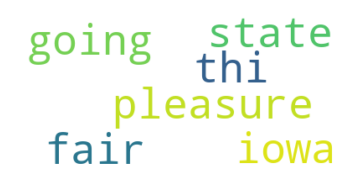

In [ ]:
word_Cloud_generation(str(comment_words),stop_word)

In [ ]:
#negative commented vide

#White Masai Trailer
df_astrix = result_data_update[result_data_update['title'] == 'Brian Trenchard-Smith on PIERREPOINT: THE LAST HANGMAN']
df_astrix

,title,description,videoId,viewCount,likeCount,dislikeCount,commentCount,Duration,FavouriteCount,Comments,Cleaned_Comments,Time,scores,compound,comp_score
12192,Brian Trenchard-Smith on PIERREPOINT: THE LAST...,Timothy Spall stars in a fascinating character...,5siEehBQPjM,1643468.0,2796.0,0.0,880.0,PT3M36S,0.0,['What a garbage film...Pierrepoint wasn&#39;t...,what garbage filmpierrepoint wasnt even last...,3:36,"{'neg': 0.296, 'neu': 0.569, 'pos': 0.135, 'co...",-0.9999,neg


In [ ]:
comment_words_least = df_astrix['Cleaned_Comments']
comment_words_least

12192    what  garbage filmpierrepoint wasnt even  last...
Name: Cleaned_Comments, dtype: object

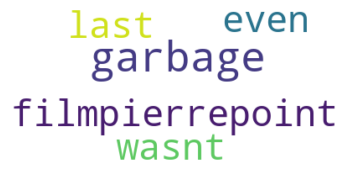

In [ ]:
word_Cloud_generation(str(comment_words_least),stop_word)